# 1.Getting the data Ready

In [141]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state = 42)

In [142]:
len(X), len(y)

(1000, 1000)

In [143]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [144]:
# Make DataFrame of circle data
import pandas as pd
circle = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                       'label' : y})
circle.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [145]:
circle.label.value_counts()

,count
label,
1,500
0,500


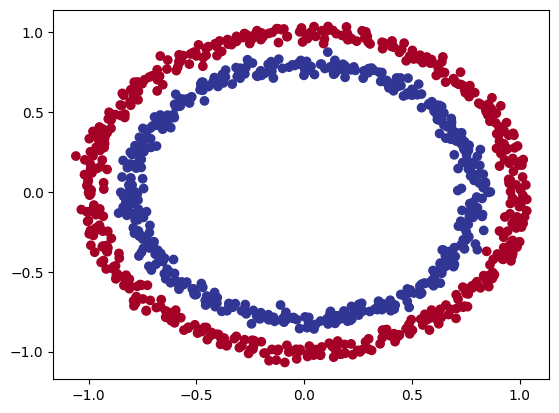

In [146]:
# Visualize Graphically now
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

### 1.1 Checking input and outputs shape

In [147]:
X.shape, y.shape

((1000, 2), (1000,))

In [148]:
# View the first examples of featurs and lables
X_sample = X[0]
y_sample = y[0]

X_sample, X_sample.shape ,y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

## 1.2 Turning data into tensors


In [149]:
type(X)

numpy.ndarray

In [150]:
import torch

In [151]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [152]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [153]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state= 42)

In [154]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model


## 2.1 Augnast model

In [155]:
import torch
from torch import nn

# Make device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 2.1 Build the model
1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()`
3. Defining `forward()`
4. Instintiate an instance of out model class and send it to target device



In [156]:
X_train.shape

torch.Size([800, 2])

In [157]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [158]:
# 1. Constructing a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. crearing 2 nn.Linaer layers capable of handeling our data
    self.layer_1 = nn.Linear(in_features= 2, out_features= 5)

    self.layer_2 = nn.Linear(in_features = 5, out_features= 1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output

# 4. Instentiate and instance of out model calsss and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [159]:
next(model_0.parameters()).device

device(type='cpu')

In [160]:
# nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=2, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)

In [161]:
# 1. Constructing a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. crearing 2 nn.Linaer layers capable of handeling our data
    self.two_Linear_layers = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=2, out_features=1))

  def forward(self, x):
    return two_Linear_layers(x)  # x -> layer_1 -> layer_2 -> output

# 4. Instentiate and instance of out model calsss and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_Linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [162]:
# 1. Constructing a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. crearing 2 nn.Linaer layers capable of handeling our data
    self.layer_1 = nn.Linear(in_features= 2, out_features= 5)

    self.layer_2 = nn.Linear(in_features = 5, out_features= 1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output

# 4. Instentiate and instance of out model calsss and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [163]:
# Make some predictions with model
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0123,  0.5534],
                      [-0.5024,  0.0445],
                      [-0.4826,  0.2180],
                      [-0.2435,  0.2167],
                      [-0.1473,  0.5865]])),
             ('layer_1.bias',
              tensor([-0.4191, -0.4217, -0.4217,  0.6360,  0.2356])),
             ('layer_2.weight',
              tensor([[ 0.4303, -0.3691, -0.4436, -0.3499, -0.3008]])),
             ('layer_2.bias', tensor([0.1811]))])

In [164]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\n First 10 predictionsL \n{torch.round(untrained_preds[:10])}")
print(f"\nFrist 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])

 First 10 predictionsL 
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [-0.],
        [-0.]])

Frist 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [165]:
y_test[:10], X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### 2.1 Setup loss function and optimizer


In [166]:
# Loss function:
# loss_fn = nn.BCELoss() : Requiers inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# ) == BCEWithLogitLoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithlogitLoss = sigmoid activation functon built-in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.1)

In [167]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# 3. Train the model

1. Forward pass
2. loss
3. optimizer zero grad
4. loss.backward
5. step step step




### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

In [168]:
# View the First 5 outputs of theforward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2333],
        [-0.0640],
        [-0.2779],
        [-0.2223],
        [ 0.3555]])

Logits are the raw outputs of our model with out beeing fed to the activation function

In [169]:
# use the sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4419],
        [0.4840],
        [0.4310],
        [0.4447],
        [0.5879]])

In [170]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [171]:
# Finding the predicted labels
y_preds = torch.round(y_pred_probs)

# In Full (logits -> pred probs -> pred lables)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra dimention once agzin
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

In [172]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 building the training loop


In [173]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set up the number of epochs
epochs = 100

# Put the data into Target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred_labels

  # Loss, Acc
  #loss = loss_fn(torch.sigmoid(y_logits, y_train) # nn.BCELoss expects predictoin probabilties as input

  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitLoss() expects raw logits as input

  acc = accuracy_fn(y_true= y_train,
                    y_pred = y_pred)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_0.eval()
  if epoch % 10 == 0:
    with torch.inference_mode():

      y_test_logit = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(y_test_logit))

      # Calculating the test and accuracy of the model on test data
      test_loss = loss_fn(y_test_logit,
                          y_test)
      test_acc = accuracy_fn(y_true = y_test,
                                        y_pred = test_pred)

    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Train_Acc: {acc:.2f}% | Test_Loss: {test_loss:.2f} | Test_Acc: {test_acc}%")

Epoch: 0 | Loss: 0.70790 | Train_Acc: 50.12% | Test_Loss: 0.71 | Test_Acc: 52.0%
Epoch: 10 | Loss: 0.70378 | Train_Acc: 50.00% | Test_Loss: 0.71 | Test_Acc: 52.5%
Epoch: 20 | Loss: 0.70113 | Train_Acc: 49.88% | Test_Loss: 0.70 | Test_Acc: 51.5%
Epoch: 30 | Loss: 0.69928 | Train_Acc: 49.88% | Test_Loss: 0.70 | Test_Acc: 51.0%
Epoch: 40 | Loss: 0.69794 | Train_Acc: 49.88% | Test_Loss: 0.70 | Test_Acc: 50.5%
Epoch: 50 | Loss: 0.69694 | Train_Acc: 49.62% | Test_Loss: 0.70 | Test_Acc: 50.0%
Epoch: 60 | Loss: 0.69617 | Train_Acc: 50.00% | Test_Loss: 0.70 | Test_Acc: 48.5%
Epoch: 70 | Loss: 0.69558 | Train_Acc: 50.38% | Test_Loss: 0.70 | Test_Acc: 49.5%
Epoch: 80 | Loss: 0.69512 | Train_Acc: 50.38% | Test_Loss: 0.70 | Test_Acc: 49.0%
Epoch: 90 | Loss: 0.69475 | Train_Acc: 50.25% | Test_Loss: 0.70 | Test_Acc: 48.5%


## 4. Make prediction and evaluate the model

In [174]:
import requests
from pathlib import Path

# Download helper function frtom learn PyTorch repo
if Path("/content/helper_functions.py").is_file():
  print("Allready exist, Skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Allready exist, Skipping download


In [175]:
from helper_functions import plot_predictions, plot_decision_boundary

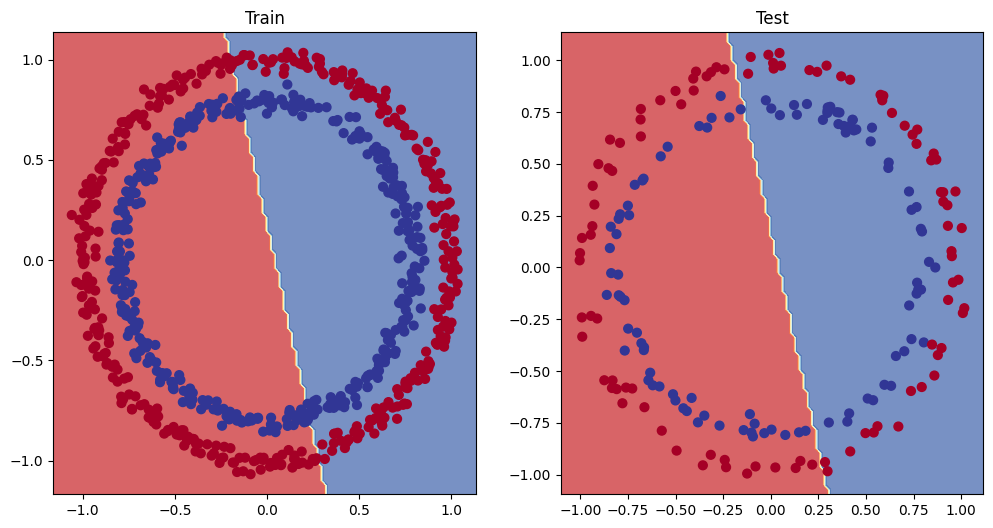

In [176]:
# plot the decision boundray of the model
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train, )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving  Model
+ Add more layer
+ Adding more hidden units
+ Fit for longer
+ Changing the activation Function
+ Change the learning rate

In [177]:
X_train.shape

torch.Size([800, 2])

In [178]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [179]:
# Creating a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Creating optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [180]:
# Making a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Traning
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate acc/loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred = y_pred)

  # Optimizer Zero grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()

  # Forward test
  with torch.inference_mode():
    y_test_logit = model_1(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logit)) # For accuracy
    test_loss = loss_fn(y_test_logit, y_test)
    test_acc = accuracy_fn(y_test, y_test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train_Acc: {acc:.2f}% | Test_Loss: {test_loss:.2f}, Test_Acc: {test_acc}%")

Epoch: 0 | Loss: 0.69396, Train_Acc: 50.88% | Test_Loss: 0.69, Test_Acc: 51.0%


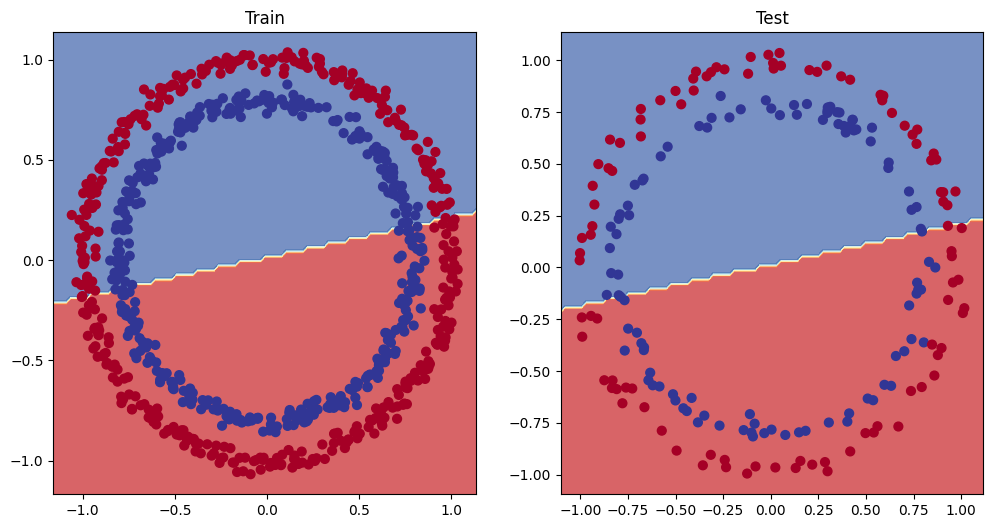

In [181]:
# Plot the decision boundray
# plot the decision boundray of the model
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train, )
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 Preparing data to see if our model ca fit a straight line

In [236]:
# Creating some data (same as 01)

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Checking the data
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [237]:
 # making train and test split
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test = train_test_split(X_regression, y_regression,
                                                     test_size = 0.2, shuffle = False)

In [238]:
len(X_train_reg), len(X_test_reg), len(y_train_reg), len(y_test_reg)

(80, 20, 80, 20)

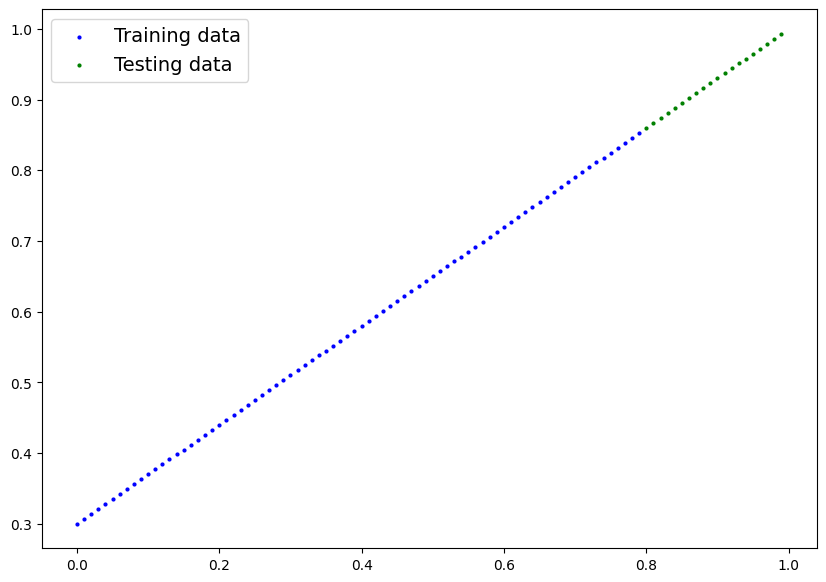

In [239]:
plot_predictions(X_train_reg, y_train_reg, X_test_reg, y_test_reg)

In [240]:
### 5.2 Adjusting `model_1` to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
 ).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [241]:
# Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr = 0.01)

In [242]:
# Training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_reg, X_test_reg = X_train_reg.to(device), X_test_reg.to(device)
y_train_reg, y_test_reg = y_train_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):
  ### Training
  model_2.train()

  # Forward pass
  y_pred = model_2(X_train_reg)

  # loss and acc
  train_loss = loss_fn(y_pred, y_train_reg)

  # optimizer zero grad
  optimizer.zero_grad()

  # Backpropagation
  train_loss.backward()

  # optimizer step
  optimizer.step()

  # evaluate the model
  model_2.eval()

  with torch.no_grad():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss:.5f}Test_Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986Test_Loss: 0.91103
Epoch: 100 | Loss: 0.02858Test_Loss: 0.00081
Epoch: 200 | Loss: 0.02533Test_Loss: 0.00209
Epoch: 300 | Loss: 0.02137Test_Loss: 0.00305
Epoch: 400 | Loss: 0.01964Test_Loss: 0.00341
Epoch: 500 | Loss: 0.01940Test_Loss: 0.00387
Epoch: 600 | Loss: 0.01903Test_Loss: 0.00379
Epoch: 700 | Loss: 0.01878Test_Loss: 0.00381
Epoch: 800 | Loss: 0.01840Test_Loss: 0.00329
Epoch: 900 | Loss: 0.01798Test_Loss: 0.00360


In [249]:
X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

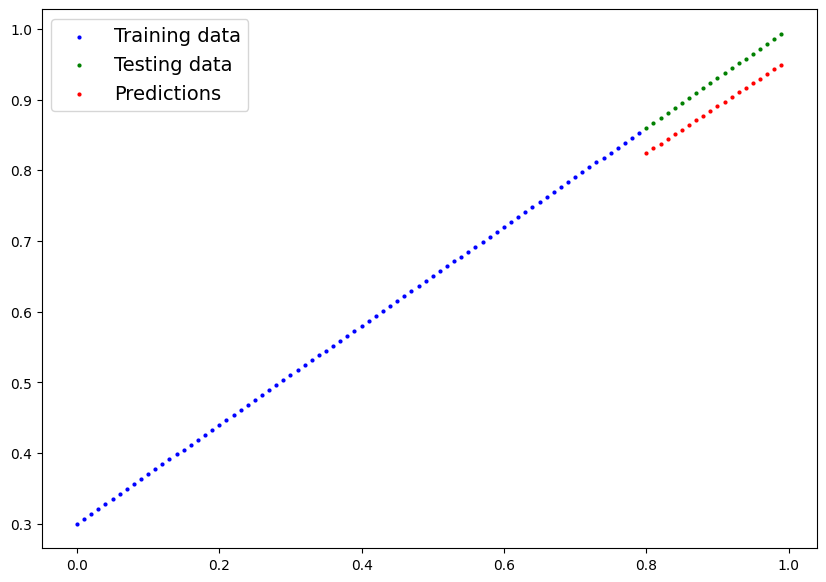

In [253]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_reg)

# plot the predictions
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

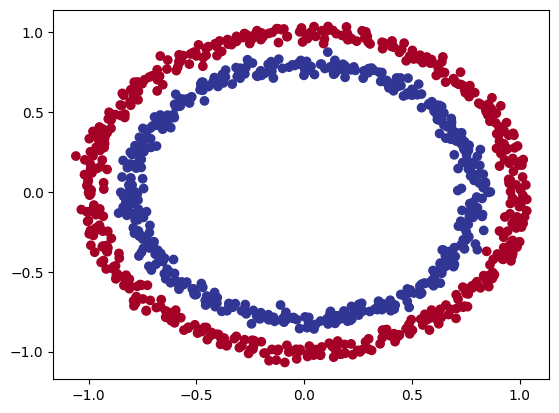

In [255]:
# Recreating the data
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state = 42)
# Visualize Graphically now
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

In [256]:
# Convert data  to tensor and then train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                    random_state =42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 building a model with non-linratiy



In [263]:
# Bulding the model with non linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, input):
    # Where to put the non-linear activatoin functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(input)))))

    # x = self.layer_1(inputs)
    # x = self.ReLU(x)
    # x = self.layer_2(x)
    # x = self.ReLU(x)
    # x = self.layer_3(x)
    # return x

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [264]:
# Setting loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)

In [265]:
# Making a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Traning
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate acc/loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred = y_pred)

  # Optimizer Zero grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()

  # Forward test
  with torch.inference_mode():
    y_test_logit = model_3(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logit)) # For accuracy
    test_loss = loss_fn(y_test_logit, y_test)
    test_acc = accuracy_fn(y_test, y_test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train_Acc: {acc:.2f}% | Test_Loss: {test_loss:.2f}, Test_Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Train_Acc: 50.00% | Test_Loss: 0.69, Test_Acc: 50.00%
Epoch: 100 | Loss: 0.69115, Train_Acc: 52.88% | Test_Loss: 0.69, Test_Acc: 52.50%
Epoch: 200 | Loss: 0.68977, Train_Acc: 53.37% | Test_Loss: 0.69, Test_Acc: 55.00%
Epoch: 300 | Loss: 0.68795, Train_Acc: 53.00% | Test_Loss: 0.69, Test_Acc: 56.00%
Epoch: 400 | Loss: 0.68517, Train_Acc: 52.75% | Test_Loss: 0.68, Test_Acc: 56.50%
Epoch: 500 | Loss: 0.68102, Train_Acc: 52.75% | Test_Loss: 0.68, Test_Acc: 56.50%
Epoch: 600 | Loss: 0.67515, Train_Acc: 54.50% | Test_Loss: 0.67, Test_Acc: 56.00%
Epoch: 700 | Loss: 0.66659, Train_Acc: 58.38% | Test_Loss: 0.66, Test_Acc: 59.00%
Epoch: 800 | Loss: 0.65160, Train_Acc: 64.00% | Test_Loss: 0.65, Test_Acc: 67.50%
Epoch: 900 | Loss: 0.62362, Train_Acc: 74.00% | Test_Loss: 0.62, Test_Acc: 79.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [268]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[10:20], y_test[10:20]

(tensor([0., 1., 0., 1., 1., 1., 1., 0., 0., 0.]),
 tensor([0., 1., 0., 1., 0., 1., 1., 0., 1., 0.]))

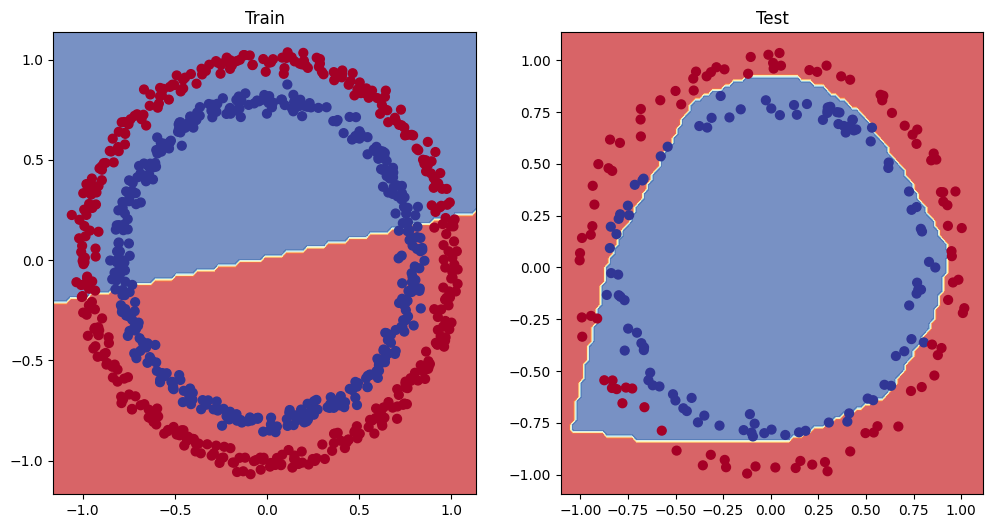

In [271]:
# plot decision boundaries
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # Linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 with non-linearity

## 7. Replicztion non-linear activation functions

In [274]:
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A.dtype

torch.float32

In [275]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

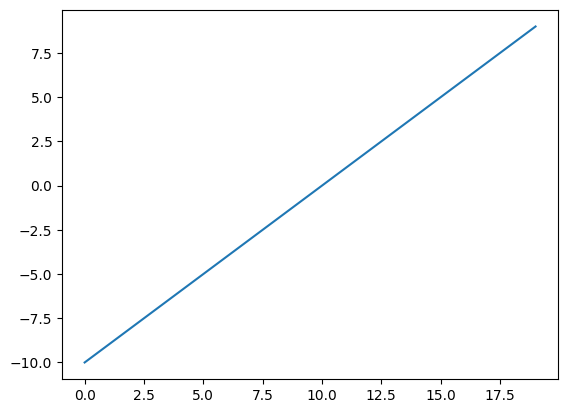

In [277]:
# Visualize the data
plt.plot(A);

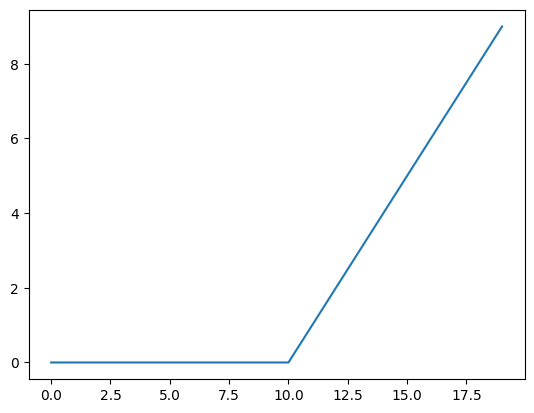

In [279]:
plt.plot(torch.relu(A));

In [281]:
# def relu(x):
#   return 0 if x <= 0 else x

def relu(x: torch.Tensor):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

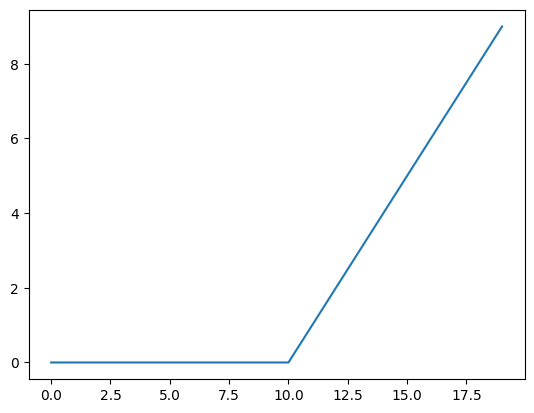

In [283]:
# Plot ReLU activation function
plt.plot(relu(A));

In [285]:
def sigmoid(x:torch.Tensor):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

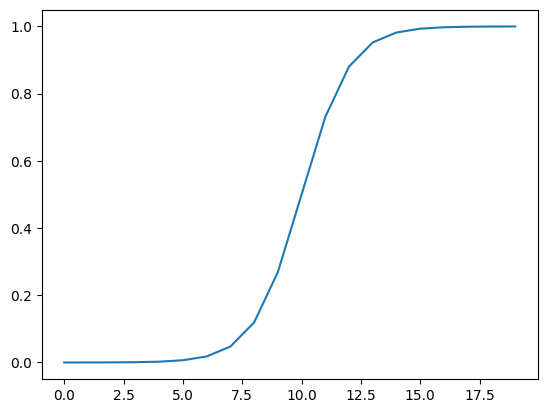

In [286]:
plt.plot(sigmoid(A));

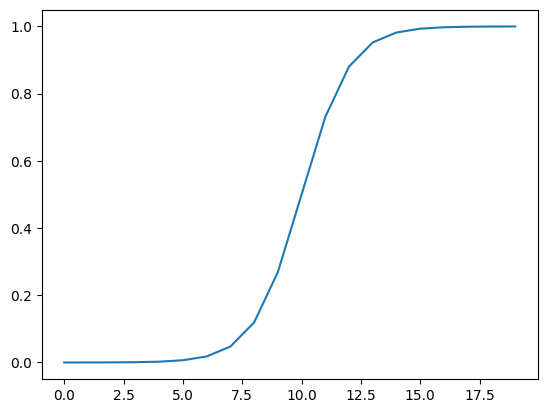

In [288]:
plt.plot(torch.sigmoid(A));

## 8. Putting it all together with multi-class classification

### 8.1 Creating a toy multi-class dataset

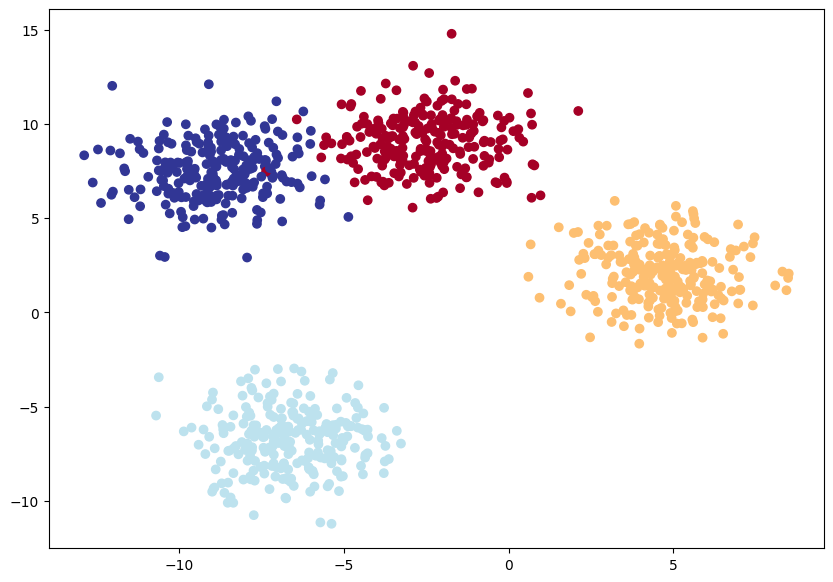

In [359]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyper parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob  = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state =RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 buidling a multi-class classification model in PyTorch

In [360]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [405]:
# Build a model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):

    """Initializes multi-class classification model.

    Args:
      input_features(int) : Number of input features to the model
      out_features(int): Number of the ouytputs feratures (number of output classes)
      hidden_units(int): Number of hidden units between layers
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=output_features)
    )

  def forward(self, inputs: torch.Tensor)-> torch.Tensor:
    return self.linear_layer_stack(inputs)


# Creating an instance of BlobModel and senfd it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

In [406]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating Loss and Optimizer

In [407]:
# Create a loss fucntionfor multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.01)


### 8.4 Getting prediction probablities for a multi-class PyTorch model

In order to evaluate and train and test out model, we need to convert out model's outputs (logits) to prediction porbabilty and then to predictoin labels.

Logits ->  Pred probs -> Pred labels

In [408]:
# Let's get some raw outputs of out model (logits)
X_blob_test.to(device)

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_pred_probs = torch.softmax(y_logits, dim=1)

y_pred_probs[:5], y_logits[:5]

(tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]]),
 tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]]))

In [409]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [410]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [411]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [412]:
# Convert out model's prediction probabilities to prediction layers
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [413]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 creating a training loop


In [414]:
# set manul seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 150

# Put data to the targeted device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


# Loop through the data
for epoch in range(epochs):
  ### Traning
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  train_acc = accuracy_fn(y_true= y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  model_4.eval()

  with torch.inference_mode():
    y_test_logit = model_4(X_blob_test)
    y_test_pred = torch.softmax(y_test_logit, dim=1).argmax(dim=1)
    test_loss = loss_fn(y_test_logit, y_blob_test.type(torch.long))

    test_acc = accuracy_fn(y_blob_test, y_test_pred)


  if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train_Acc: {train_acc:.2f}% | Test_Loss: {test_loss:.2f}, Test_Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Train_Acc: 40.38% | Test_Loss: 1.15, Test_Acc: 38.50%
Epoch: 10 | Loss: 1.06493, Train_Acc: 55.38% | Test_Loss: 1.07, Test_Acc: 50.50%
Epoch: 20 | Loss: 0.98190, Train_Acc: 62.62% | Test_Loss: 1.00, Test_Acc: 57.50%
Epoch: 30 | Loss: 0.91138, Train_Acc: 70.50% | Test_Loss: 0.94, Test_Acc: 67.00%
Epoch: 40 | Loss: 0.85285, Train_Acc: 88.38% | Test_Loss: 0.88, Test_Acc: 87.50%
Epoch: 50 | Loss: 0.80430, Train_Acc: 92.12% | Test_Loss: 0.84, Test_Acc: 93.00%
Epoch: 60 | Loss: 0.76350, Train_Acc: 93.62% | Test_Loss: 0.80, Test_Acc: 94.50%
Epoch: 70 | Loss: 0.72848, Train_Acc: 94.88% | Test_Loss: 0.77, Test_Acc: 95.00%
Epoch: 80 | Loss: 0.69769, Train_Acc: 95.62% | Test_Loss: 0.74, Test_Acc: 95.00%
Epoch: 90 | Loss: 0.66978, Train_Acc: 96.38% | Test_Loss: 0.71, Test_Acc: 96.50%
Epoch: 100 | Loss: 0.64382, Train_Acc: 96.88% | Test_Loss: 0.68, Test_Acc: 97.00%
Epoch: 110 | Loss: 0.61912, Train_Acc: 97.62% | Test_Loss: 0.66, Test_Acc: 97.50%
Epoch: 120 | Loss: 0.59516,

### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [415]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
# View the first 10 predictions
y_logits[:10]

tensor([[-1.5061,  2.3352, -3.5510, -3.2279],
        [-0.1656, -2.9512, -2.8015,  0.3931],
        [ 0.1135, -0.3019,  0.4295, -0.0688],
        [-1.0173,  1.7050, -1.8618, -1.9757],
        [ 0.3577, -2.2776, -4.2551, -1.0884],
        [-0.2627, -3.4156, -3.2754,  0.5149],
        [ 0.0349, -0.3563,  0.3423, -0.0531],
        [ 0.2902, -2.9036, -3.4742, -0.3917],
        [ 0.0546, -0.4802,  0.3491, -0.1578],
        [ 0.3867, -2.8674, -3.5811, -0.5553]])

In [416]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.0209, 0.9727, 0.0027, 0.0037],
        [0.3470, 0.0214, 0.0249, 0.6067],
        [0.2587, 0.1708, 0.3549, 0.2156],
        [0.0587, 0.8935, 0.0252, 0.0225],
        [0.7592, 0.0544, 0.0075, 0.1788],
        [0.3060, 0.0131, 0.0150, 0.6659],
        [0.2530, 0.1711, 0.3441, 0.2317],
        [0.6370, 0.0261, 0.0148, 0.3221],
        [0.2676, 0.1568, 0.3592, 0.2164],
        [0.6909, 0.0267, 0.0131, 0.2694]])

In [417]:
# Go drom pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [418]:
 y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

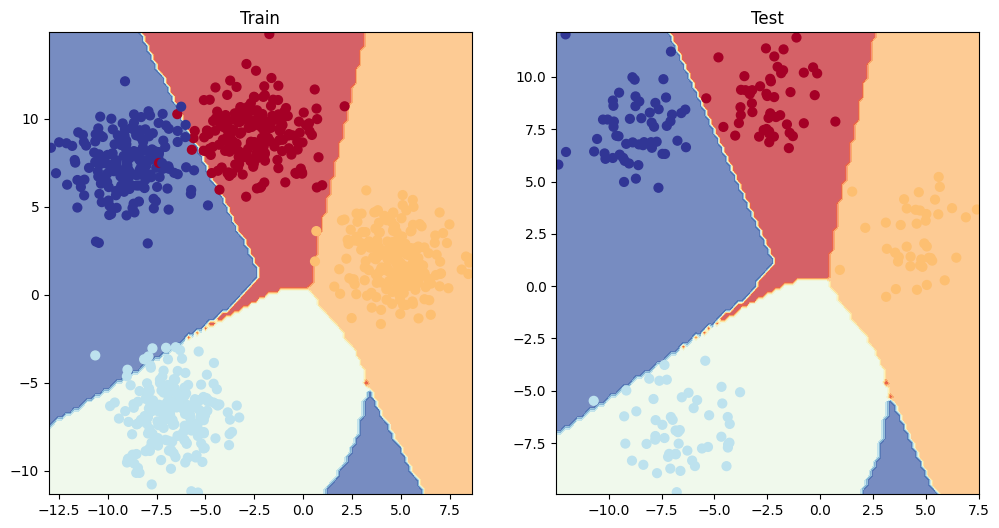

In [419]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test, y_blob_test)

## 9. Few more classification metrics... (To evaluate our classification model)
+ Accuracy (Better for balanced classes)
+ Recall
+ Precision
+ f1 score
+ Confusion matrix
+ Classification report

In [421]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 20.3 MB/s eta 0:00:00


In [431]:
from torchmetrics.classification import MulticlassAccuracy

torchmetric_accuracy = MulticlassAccuracy(num_classes=NUM_CLASSES).to(device)
accuracy = torchmetric_accuracy(y_preds, y_blob_test)
accuracy

tensor(0.9953)